In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [2]:
# Load data
fashion_mnist = tf.keras.datasets.fashion_mnist 
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Data preprocessing
X_train = X_train / 255.0
X_test = X_test / 255.0

# Validation split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
   test_size=0.2)

In [3]:
model = tf.keras.models.load_model('models/fashion_mnist.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [4]:
loss_value, acc = model.evaluate(X_test, y_test, verbose=0)
print('test accuracy: {}%'.format(acc * 100))

test accuracy: 87.87999749183655%


In [5]:
index_mask = np.arange(28 * 28)
np.random.shuffle(index_mask)
index_mask

array([122, 158, 326, 283, 597, 526, 609, 423, 186, 716,  94, 621,  59,
       354, 156, 443, 402, 218, 653, 520, 172, 765,  21, 626,  19, 527,
       732, 107, 318,  90,   9, 496,  74, 662, 391, 257, 728, 319, 606,
       469, 462, 494,   3, 126, 704,  56, 594, 635, 701, 436, 743, 155,
       100,  87, 634, 734,  78, 415, 281, 647, 397, 783,  45, 686, 265,
       151, 661, 691, 387, 617, 256,  42, 229, 488, 480, 479, 302, 272,
       755, 298, 237, 577, 576, 140, 118,  80, 215, 334, 125, 123,  75,
       157, 730, 657, 105, 192, 687, 682,  92, 396, 260, 596, 457, 764,
       671, 663,  11, 649, 660, 381, 446, 515, 546, 492, 528, 593, 399,
       723, 539, 553, 506, 747, 667, 760, 665, 311, 475, 392, 124,  58,
       360, 664, 305, 228, 420, 608,  54, 590,  18, 645, 261,  26, 254,
       655, 370, 291,  31, 182, 522, 112, 405, 408, 205, 627, 781, 538,
       709, 435, 560, 589, 129, 325, 754,  83, 167, 481, 177, 378, 373,
       131, 134, 263, 310, 735, 388, 696, 343, 516, 315,  35, 44

In [6]:
X_test_demo = X_test.reshape(-1, 28 * 28)
X_test_demo = X_test_demo[:, index_mask]
X_test_demo = X_test_demo.reshape(-1, 28, 28)

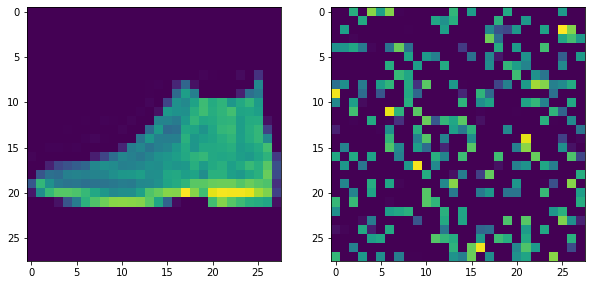

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(10, 10))
axs[0].imshow(X_test[0])
axs[1].imshow(X_test_demo[0])
plt.show()

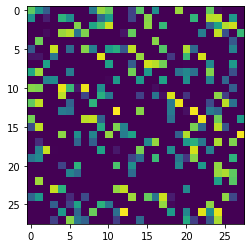

In [14]:
# que es esto?
plt.imshow(X_test_demo[3])

In [9]:
w, b = model.layers[1].get_weights()

In [10]:
w.shape, b.shape

((784, 256), (256,))

In [11]:
w_demo = w[index_mask, :]
w_demo.shape

(784, 256)

In [12]:
model.layers[1].set_weights([w_demo, b])

In [13]:
loss_value, acc = model.evaluate(X_test_demo, y_test, verbose=0)
print('test accuracy: {}%'.format(acc * 100))

test accuracy: 87.87999749183655%
